In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [2]:
iris = load_iris()
X = iris.data[:,:2]
y = iris.target

In [ ]:
# filter out class 2 (viginica) for binary classification

X = X[y!=2]
y = y[y!=2]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [6]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train,y_train)
y_pre_lr = clf_lr.predict(X_test)
print(classification_report(y_test,y_pre_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [9]:
clf_nb = GaussianNB()
clf_nb.fit(X_train,y_train)
y_pred_nb = clf_nb.predict(X_test)
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



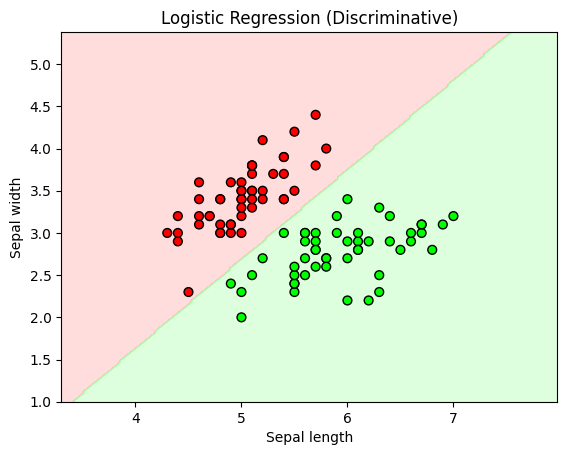

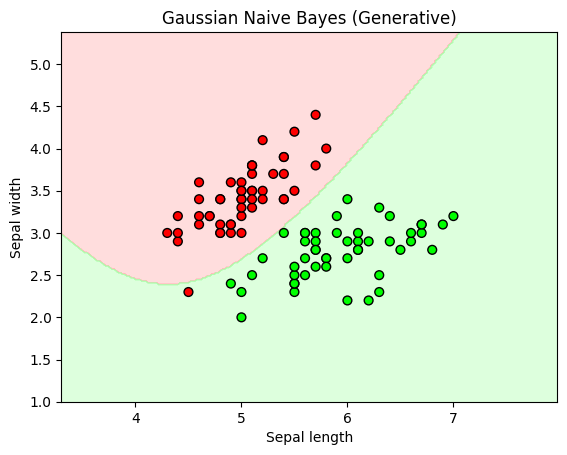

In [16]:
def plot_boundary(clf,X,y,title):
    h = 0.02
    x_min,x_max = X[:,0].min()-1,X[:,0].max() +1
    y_min,y_max = X[:,1].min()-1,X[:,1].max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA','#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    plt.contourf(xx,yy,Z,alpha = 0.4,cmap= cmap_light)
    plt.scatter(X[:,0],X[:,1],cmap=cmap_bold,c =y,edgecolor = 'k',s = 40)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(title)
    plt.show()
plot_boundary(clf_lr, X, y, "Logistic Regression (Discriminative)")
plot_boundary(clf_nb, X, y, "Gaussian Naive Bayes (Generative)")

### custom naive bayes classifier

In [10]:
from collections import Counter
class NBclassifier(object):
    """custom NB classifier"""
    def __init__(self):
        self.classes=  None
        self.means = {}
        self.stds = {}
        self.priors = {}

    def myGuassian(self,x,mu,sig):
        """guassian fn to compute likelihood"""
        lhd= 1/(sig*np.sqrt(2 * np.pi))*np.exp(-(x-mu)**2/(2 * sig**2))
        return lhd
    def fit(self,X,y):
        """Train by computing mean, std, and priors per class"""
        self.classes = np.unique(y)
        for c in self.classes:
            X_c = X[y==c]
            self.means[c] = np.mean(X_c,axis = 0)
            self.stds[c] = np.std(X_c,axis = 0,ddof=1)
            self.priors[c] = len(X_c)/len(X)
            
    def predict(self,X):
        y_Pred = []
        for sample in X:
            posteriors = []
            for c in self.classes:
                likelihoods = self.myGuassian(sample,self.means[c],self.stds[c])
                total_likelihood = np.prod(likelihoods)   
                posterior = total_likelihood * self.priors[c]
                posteriors.append(posterior)
            y_Pred.append(self.classes[np.argmax(posteriors)])
        return np.array(y_Pred)
    def score(self,X,y):
        return np.mean(self.predict(X) == y)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load and filter dataset (binary classification)
iris = load_iris()
X = iris.data[:, :2]  # first two features
y = iris.target
X = X[y != 2]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train custom Naive Bayes
nb1 = NBclassifier()
nb1.fit(X_train, y_train)
y_pred1 = nb1.predict(X_test)
print("Accuracy:", nb1.score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))


Accuracy: 0.43333333333333335
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

